<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning & Deep Learning</b></center>

<center><b><h1>Lab - 5</b></center>    
<pre>    

# SVR

# Importing the libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Read World bank CSV

In [39]:
df=pd.read_csv('WorldBank.csv')
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,India,IND,Export value index (2000 = 100),TX.VAL.MRCH.XD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.147485e+02,7.004085e+02,7.429281e+02,7.614417e+02,6.322694e+02,6.242250e+02,7.061028e+02,7.663608e+02,NaN,NaN
1,India,IND,Insurance and financial services (% of commerc...,TX.VAL.INSF.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,6.403614e+00,5.246771e+00,5.729495e+00,5.060904e+00,4.706801e+00,4.471147e+00,3.760466e+00,3.921611e+00,3.438072e+00,NaN
2,India,IND,"Merchandise imports by the reporting economy, ...",TM.VAL.MRCH.RS.ZS,4.983551,6.488050e+00,1.012461e+01,9.451370e+00,1.052948e+01,1.089112e+01,...,7.550664e-01,2.738416e-01,4.409538e-01,1.514439e+00,2.228351e+00,2.270593e+00,1.770314e+00,5.354193e-01,NaN,NaN
3,India,IND,Food imports (% of merchandise imports),TM.VAL.FOOD.ZS.UN,NaN,NaN,1.708001e+01,1.519791e+01,1.686304e+01,2.200813e+01,...,3.741041e+00,4.048246e+00,3.895215e+00,4.458509e+00,5.758038e+00,6.505293e+00,6.137617e+00,4.156488e+00,4.248261e+00,NaN
4,India,IND,Share of tariff lines with international peaks...,TM.TAX.MRCH.IP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.434346e+00,8.641136e+00,8.576307e+00,NaN,5.802677e+00,7.707811e+00,8.288774e+00,9.111423e+00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,India,IND,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.002065e+00,1.312934e+00,1.516276e+00,1.695659e+00,2.092116e+00,1.937363e+00,1.506588e+00,1.552336e+00,1.760283e+00,NaN
1436,India,IND,"Net capital account (BoP, current US$)",BN.TRF.KOGT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.791581e+07,-5.972328e+08,9.618297e+08,-7.433364e+07,3.706943e+07,1.368359e+08,3.731153e+07,-1.231007e+08,-1.155591e+09,NaN
1437,India,IND,"Travel services (% of service imports, BoP)",BM.GSR.TRVL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.761773e+01,1.544257e+01,1.475397e+01,1.799216e+01,1.795378e+01,1.707263e+01,1.686302e+01,1.716750e+01,1.755462e+01,NaN
1438,India,IND,Cereal production (metric tons),AG.PRD.CREL.MT,NaN,8.737650e+07,8.725755e+07,9.037301e+07,9.370600e+07,7.969950e+07,...,2.878600e+08,2.932900e+08,2.949095e+08,2.960100e+08,2.843330e+08,2.978500e+08,3.136100e+08,NaN,NaN,NaN


# Perform conditional selection to find - Population ages 15-64 (% of total population)

In [40]:
# Perform conditional selection to find - Population ages 15-64 (% of total population)
df_population_15_64 = df[df['Indicator Name'] == 'Population ages 15-64 (% of total population)']
df_population_15_64

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
9,India,IND,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,56.49748,56.177532,55.807455,55.461664,55.248939,55.211351,...,64.429404,64.805519,65.208489,65.59598,65.944164,66.274262,66.538187,66.766743,67.003811,NaN


# Divide the data into input and output

In [41]:
# Divide the data into input and output
x=[i for i in range(1960, 2020)]
y=df_population_15_64.iloc[:, 4:-1].values.flatten().astype(float)
x


[1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

In [42]:
y

array([56.49748004, 56.17753236, 55.80745463, 55.46166361, 55.24893881,
       55.21135053, 55.09090078, 55.15534672, 55.34507283, 55.57014408,
       55.78194745, 55.85676846, 55.95268174, 56.07247186, 56.23447551,
       56.44405309, 56.49722595, 56.62068516, 56.78900152, 56.9691436 ,
       57.1425581 , 57.18105454, 57.22630775, 57.28875038, 57.39054366,
       57.54142108, 57.55350984, 57.6545119 , 57.81875323, 58.01501187,
       58.22990246, 58.37403848, 58.5472698 , 58.75605047, 59.012126  ,
       59.31657719, 59.56507329, 59.8572303 , 60.18600058, 60.53971518,
       60.90862046, 61.18898716, 61.4993847 , 61.83084479, 62.173897  ,
       62.52276485, 62.80842981, 63.10261029, 63.40924784, 63.74196691,
       64.10821053, 64.429404  , 64.80551944, 65.20848906, 65.5959799 ,
       65.94416405, 66.27426247, 66.53818711, 66.7667425 , 67.00381119])

# Plot scatter plot of Population ages 15-64 (% of total population)

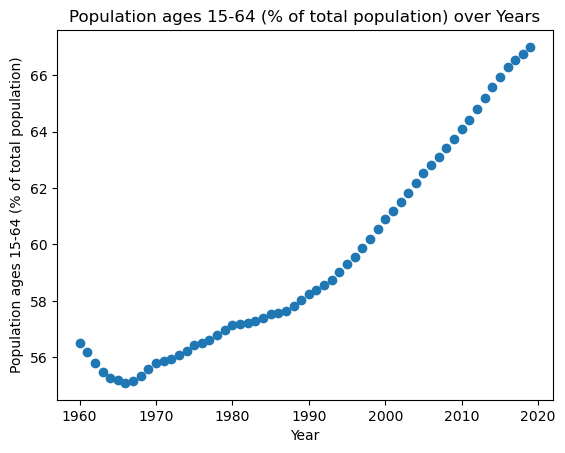

In [43]:

plt.scatter(x,y)
plt.xlabel('Year')
plt.ylabel('Population ages 15-64 (% of total population)')
plt.title('Population ages 15-64 (% of total population) over Years')
plt.show()

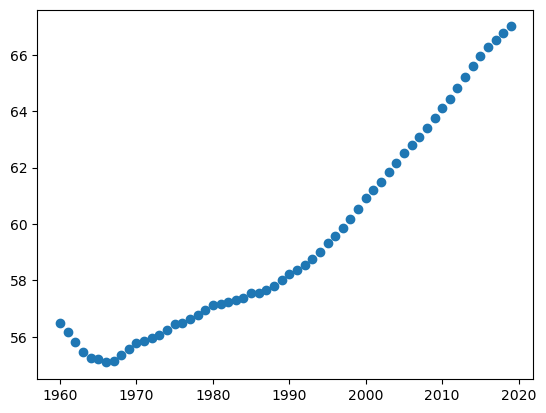

# Feature Scaling (Mandatory for SVR)**
SVR is highly sensitive to the range of data points. If we don't scale (normalize) the data, the model will fail to find the correct hyperplane.

In [45]:
from sklearn.preprocessing import StandardScaler
import numpy as np
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(np.array(x).reshape(-1, 1))
Y = sc_y.fit_transform(y.reshape(-1, 1))

Scaling Complete.


# Splitting the dataset into the Training set and Test set

In [48]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


In [62]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressorLinear = SVR(kernel = 'linear')
regressorPoly = SVR(kernel = 'poly')
regressorLinear.fit(X_train, Y_train.ravel())
regressorPoly.fit(X_train, Y_train.ravel())
regressor.fit(X_train, Y_train.ravel())
Y_pred_linear = regressorLinear.predict(X_test)
Y_pred_poly = regressorPoly.predict(X_test)
Y_pred = regressor.predict(X_test)
Y_pred_inverse=sc_y.inverse_transform(Y_pred.reshape(-1, 1))
Y_pred_linear_inverse=sc_y.inverse_transform(Y_pred_linear.reshape(-1, 1))
Y_pred_poly_inverse=sc_y.inverse_transform(Y_pred_poly.reshape(-1, 1))


In [ ]:
regressor.predict([[sc_x.transform([[2025]])[0][0]]])  # Predicting a new result

[1.76690528]


# Fitting SVR on 3 Different Kernel on dataset

SVR()

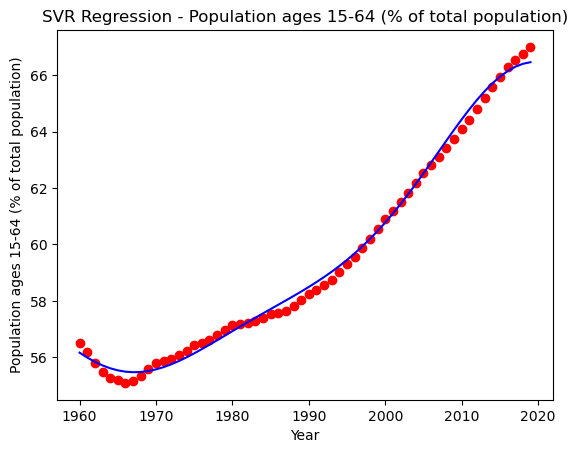

In [53]:
#plot
plt.scatter(x, y, color = 'red')
plt.plot(x, sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color = 'blue')
plt.title('SVR Regression - Population ages 15-64 (% of total population)')
plt.xlabel('Year')
plt.ylabel('Population ages 15-64 (% of total population)')
plt.show()

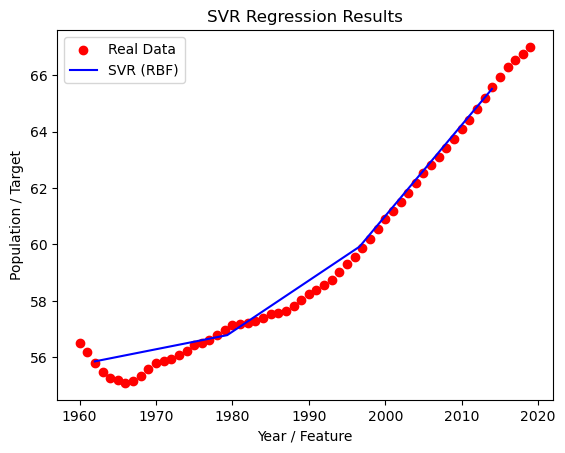

# Predict the x_test using 3 Kernel

In [55]:
# Predict the x_test using 3 Kernel

regressor.score(X_train, Y_train)

0.9953867997446317

In [56]:
regressor.score(X_test, Y_test)

0.9963995902170167

In [ ]:
re

array([57.55350984, 59.31657719, 67.00381119, 57.81875323, 55.85676846,
       55.80745463, 59.012126, 66.7667425, 60.90862046, 57.22630775,
       55.24893881, 55.78194745, 58.22990246, 61.18898716, 58.75605047,
       61.83084479, 63.74196691, 55.15534672], dtype=object)

array([57.73445326, 59.30206118, 64.8451716 , 57.99812952, 55.96479236,
       56.12587167, 59.06485884, 64.91876466, 60.76906052, 57.24445561,
       55.93360816, 55.89821768, 58.29641078, 61.1088798 , 58.84682535,
       61.81299688, 63.81278461, 55.81527994])

# Visualising the  results

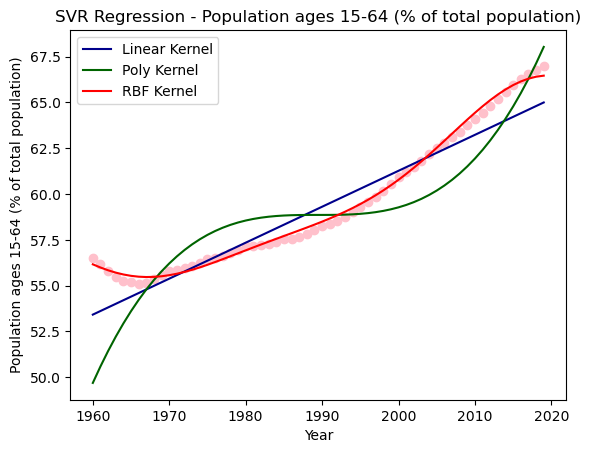

In [72]:
# Visualising the  results linerar poly and rbf
# give me rgb of

plt.scatter(x, y, color = 'pink')
plt.plot(x, sc_y.inverse_transform(regressorLinear.predict(X).reshape(-1, 1)), color = 'darkblue', label='Linear Kernel')
plt.plot(x, sc_y.inverse_transform(regressorPoly.predict(X).reshape(-1, 1)), color = 'darkgreen', label='Poly Kernel')
plt.plot(x, sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color = 'red', label='RBF Kernel')
plt.title('SVR Regression - Population ages 15-64 (% of total population)')
plt.xlabel('Year')
plt.ylabel('Population ages 15-64 (% of total population)')
plt.legend()
plt.show()


### **Student Activity : Prediction**
**Task:** Predict the value for the Year **2025** (or value 6.5 in the demo data). 
Remember: You must transform the input before predicting, and inverse transform the output.

The predicted value for input 2025 is: 66.47
